<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/CNN_Old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.

## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

# What is a Convolutional Neural Network (CNN)?
(Reference : [link text](https://www.youtube.com/watch?v=QzY57FaENXg))
<p>CNN is a specialised kind of neural network for processing data that has a known, grid-like topology. The most common example of grid-structured data is a 2D image. An important characteristic of CNN is its operation, which is referred to as convolution. Convolution is a special kind of linear operation.
<p>In general CNN consists of one or more convolutional layers and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of CNN is designed in such a way that it takes advantage of the 2D structure of an input image. Another benefit of CNN is that they are easier to train and have many fewer parameters than a fully connected network with the same number of hidden layers.

# Concept of Convolution Operator 
(Reference : [link text](https://www.youtube.com/watch?v=Etksi-F5ug8))
<p>Convolution is a type of linear operator. It operates on two functions of real-valued arguments. 
<p> Let consider an example for better understanding, suppose we are using a laser sensor to track the location of a spaceship. where the laser sensor provides a single output $x(t)$ w.r.t. position at time $t$. Since both these variables are real-valued, we can get different output as the time changes. In order to get a less noisy estimate of the spaceship, we take the average of several measurements (or output). Assigning the weighted average to the recent measurements since it is more relevant. Using the weighting function $w(a)$, a is the time of a measurement.
<p> Applying this function everytime will get a new function $b$ resulting in the most accurate estimation of the position of the spaceship $$b(t) = \int_{} x(a)w(t-a)da$$
This operator is called convolution. The operator is generally denoted with an asterisk: $$s(w) = (x * w)(t)$$
In the above example , $w$ needs to be 0 for all negative arguments. In CNN terminology, the first argument to the convolution is often referred to as the $input$ and the second argument as the $kernel$. And the output is the $feature map$.
<p>An example of convolution without kernel-flip is shown above. In the above fig. the output is restricted to only one position where the kernel lies entirely within the image, called $valid$ convolution. The boxes were drawn with arrows to indicate how the upper-left element of the output tensor is formed by applying the kernel to the upper-left region of the input tensor respectively.

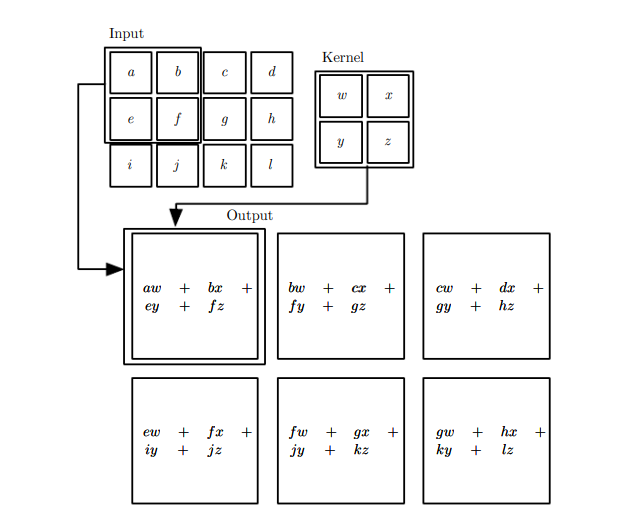

1.   Sparse Weight : In general every output unit interacts with every input unit. Convolutional networks typically have sparse weight i.e., making the kernel smaller than the input. 
<p> For example, while processing an image, it consists of thousands to millions of pixels in the output image, but we can detect small features such as edges with kernels that occupy only tens or hundreds of pixels. This Results in fewer parameters, which reduces both the memory requirement and improves the statistical efficiency.  
2.   Equivariant representation : It means that if the input changes, the output changes in the same way. In the image, convolution creates a 2D map of where certain features appear in the input. If we move the object in the input, its representation will move the same amount in the output.
 
3. Parameter sharing : It refers to the same parameter for more than one function in a model.That is, each member of the kernel is used at every position of the input. The parameter sharing used by the convolution operation means that rather than learning a separate set of parameters for every location, it learns only one set. Although it does not affect the runtime of forward propagation, it further reduces the storage requirement of the model to $k$ parameters.

# Pooling
(Reference : [link text](https://www.youtube.com/watch?v=zg_AA3fZpE0))
<p>A pooling function replaces the output of the net at a certain location with a summary statistic of the nearby outputs. In other words, pooling is a down-sampling operation which reduces the dimensionality of the feature map in order to introduce the translational invariance to small shifts and it reduces the number of learnable parameters.
 
 
Max Pooling : Max pooling extracts patches from the input feature maps, and provides the maximum output value in each patch, and discards all the other values. A max pooling with a filter of size 2 × 2 with a stride of 2 is commonly used in practice. This downsamples the in-plane dimension of feature maps by a factor of 2.Here the depth dimension of feature maps remains unchanged.
<p> Consider an example of max pooling operation with a filter size of 2 × 2, no padding, and a stride of 2, which extracts 2 × 2 patches from the input tensors, outputs the maximum value in each patch, and discards all the other values, resulting in downsampling the in-plane dimension of an input tensor by a factor of 2.

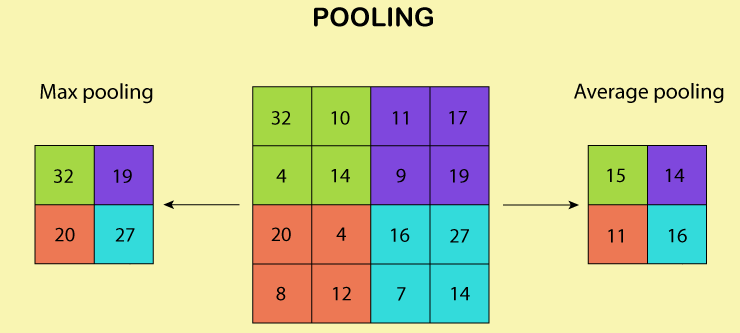






#Forward Propagation


 *   Images are fed into the input in the form of numbers. These numerical values represent the intensity of each pixel in an image.
 *   The neurons in the hidden layers apply a few mathematical operations on these values. To perform the mathematical operations, we have certain parameters that are initialised randomly.
 *   After these mathematical operations at the hidden layer, the result is sent to the output layer and thus prediction is made.



#Backward Propagation


*   From the forward propagation the output is generated and then these output is compared with the actual value.
*   After comparison, how far or close this is from actual value the parameters are updated.
*   The forward propagation process is repeated using the updated parameter values and new outputs are generated.

# CNN Architecture
 
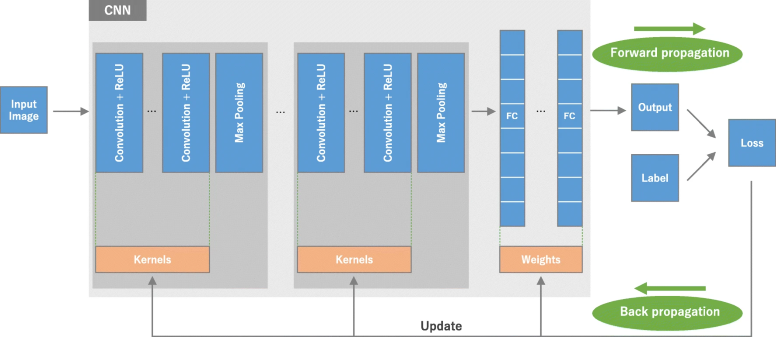
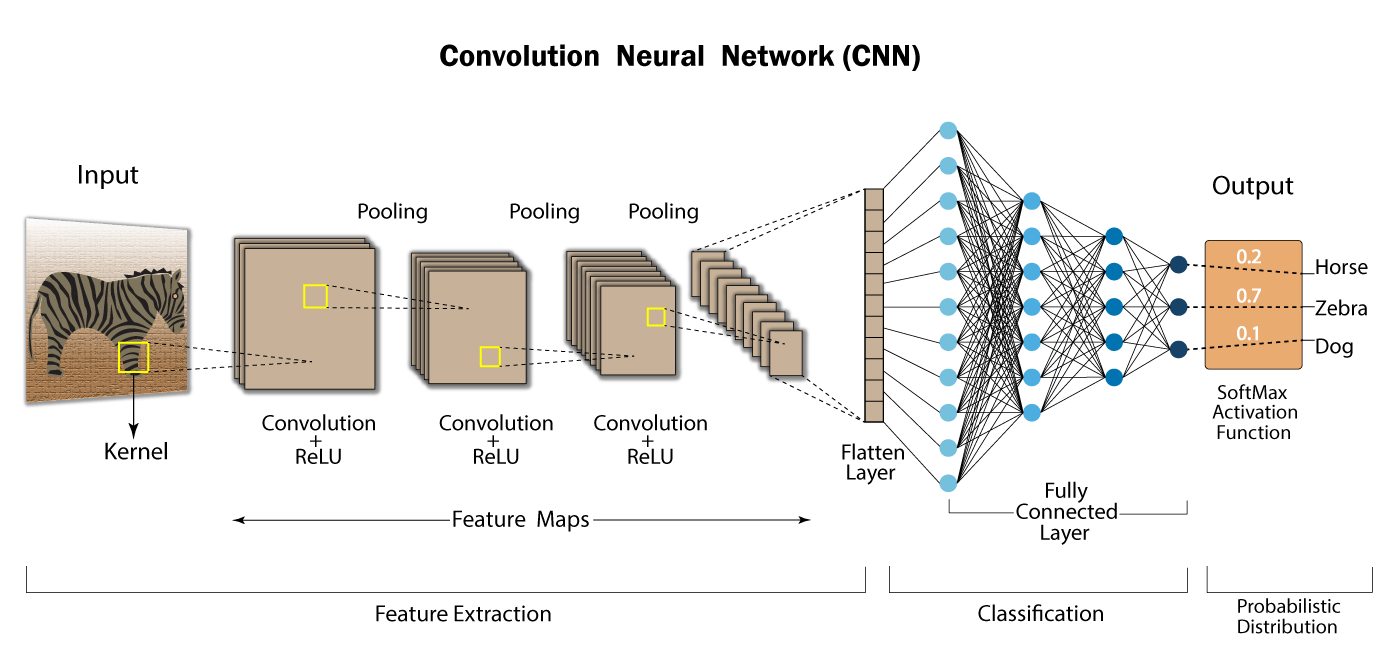
 
*   In Forward Propagation
 
 
 
> Convolutional Layer
 
Convolution is often represented mathematically with an asterisk '*' sign. If we have an input image represented as $X$ and filter represented with $f$, then the expression would be: $$Z = X * f$$
<p> Consider an image of size 3x3 and a kernel of size 2x2:
It will go through the patches and perform element - wise multiplication and the values are summed up:

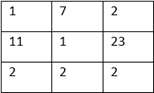
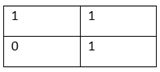
 
(1 * 1 +  7 * 1 + 11 * 0 + 1 * 1) = 9
<p> (7 * 1 + 2 * 1 + 1 * 0 + 23 * 1) = 32
<p> (11 * 1 + 2 * 1 + 2 * 0 + 2 * 1) = 14
<p> (1 * 1 + 23 * 1 + 2 * 0 + 2 * 1) = 26
 
**General formula : dimension of image =$ (n,n)$ & dimension of filter =$ (f,f)$**
<p>Dimension of output : $((n - f + 1),(n - f + 1))$
 
> Fully Connected Layer
The feature extracted from the data by the convolution layer is sent to a fully connected layer in order to generate the final result. The output from the convolution layer was a 2D matrix. Ideally, we want each row to represent a single input image. Also, the FC layer can only work with 1D data. Thus, the values generated from the previous operation are first converted into a 1D format.
<p> Here, all these individual values are treated as separate features that represent the image.
 
 
The FC layer performs two operations on the incoming data:
 
 
1.   Linear Transformation

<p>Its equation is $$Z = W^TX + b$$
where $W$ represents Weight, $X$ represents Input and $b$ represents Bias. Considering the size of the matrix is $(m,n)$
, $m$ will be equal to the number of features. Since we have 4 features from the convolution layer, thus $m=4$.
<p> The value of $n$ will depend upon the number of neurons in the layer. For example if we have two neurons, then the shape of the matrix will be $(4,2)$.
<p>$$X = \begin{bmatrix} X_1 \\ X_2 \\ X_3 \\ X_4 \end{bmatrix}, W =\begin{bmatrix}W_{11} & W_{12} \\W_{21} & W_{22} \\W_{31} & W_{32} \\W_{41} & W_{42} \end{bmatrix},b = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} $$ where $X, W, b$  are input, randomly initialised weight matrix, and randomly initialised bias matrix respectively.
$$Z = W^TX + b$$
 
$$ = \begin{bmatrix} W_{11} & W_{21} & W_{31} & W_{41} \\W_{12} & W_{22} & W_{32} & W_{42} \end{bmatrix} \begin{bmatrix} X_1 \\ X_2 \\ X_3 \\ X_4 \end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$$
$$ Z_{2x2}= \begin{bmatrix} W_{11}X_1 & W_{21}X_2 & W_{31}X_3 & W_{41}X_4 \\W_{12}X_1 & W_{22}X_2 & W_{32}X_3 & W_{42}X_4 \end{bmatrix} +\begin{bmatrix} b_1 \\ b_2 \end{bmatrix} $$
 
2. Non-linear transformation
The linear transformation alone cannot capture the complex relationship. Thus, adding a new component as a non-linear transformation in the network adds non-linearity to the data. The new component in the architecture is called the **Activation Function**. There are numbers of activation functions:
 
>1.   Sigmoid function $$f(x) =  \frac{1} {1+ e^{-x}}$$
its output ranges between 0 & 1.
2.   Tanh Function $$f(x) = tanh(x) = \frac{2}{1 + e^{-2x}} - 1$$
3. ReLU Function $$f(x) = \left\{\begin{array}\\max(0,x),& \mbox{if} \ x \geq 0 \\ 0, & \mbox{if } \ x < 0 \end{array} \right. $$
4. Softmax Function $$\begin{bmatrix} 1.3 \\ 5.1 \\ 2.2 \\ 0.7 \\1.1 \end{bmatrix}- ---> \frac{e^{-x_i}}{\sum^k_{j=1}e^{z_j}}- --->\begin{bmatrix} 0.02 \\ o.90 \\ 0.05 \\ 0.01 \\0.02 \end{bmatrix}$$
 
##Summarising
Step 1 : Loading the input image {say $X$}
<p>Step 2 : Define randomly initialised filter matrix images that are convolved with the filter $$Z_1 = X * f$$
<p> Step 3 : Apply the activation function on the result $$A = Activation Function(Z_1)$$
<p> Step 4 : Define (randomly initialised) weight & bias matrix. Apply linear transformation on matrix $$Z_2 = W^TX + b$$
<p> Step 5 : Apply the activation function on the data. This will be the final output. $$O = Activation Function(Z_2)$$

# Image Classification using CNN
(Reference : [link text](https://www.youtube.com/watch?v=7HPwo4wnJeA))
<p>To implement a CNN model we will be using the CIFAR-10 dataset. It has 60,000 colour images in 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images.

In [ ]:
#importing necessary library
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import cifar10 #directly importing the dataset from keras module

In [ ]:
# setting class names, there are 10 different classes of colour images of size 32x32
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#dividing each pixel of the image by 255.0 so the pixel range will be between 0–1
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

Here the first value (50,000/10,000) shows the number of images. The second and third values show the image size i.e., height and width( 32x32). The fourth value(3) represents the RGB format.

In [ ]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

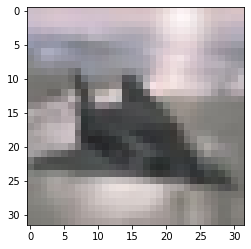

In [ ]:
plt.imshow(x_test[255])

Building CNN
Firstly the feature of image is extracted in convolutional layer, secondly using the pooling layer to reduce the dimensionality of the image inorder to prevent overfitting, thirdly using the flattening layer will transform the model in 1-Dimension and feed it to the fully connected layer and prediction will be done by the dense layer.


In [ ]:
cifar10_model=tf.keras.models.Sequential()
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
cifar10_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 18s 4ms/step - loss: 1.4025 - sparse_categorical_accuracy: 0.4918
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0140 - sparse_categorical_accuracy: 0.6386
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8634 - sparse_categorical_accuracy: 0.6935
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7710 - sparse_categorical_accuracy: 0.7297
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7028 - sparse_categorical_accuracy: 0.7541
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6457 - sparse_categorical_accuracy: 0.7718
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5966 - sparse_categorical_accuracy: 0.7889
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5666 - sparse_categorical_accuracy: 0.7969
Epoch 9/15
1563/1563 [=========

In [ ]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6455 - sparse_categorical_accuracy: 0.7854


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7853999733924866


# Transforming image using CNN 
This notebook demonstrates a fun experiment in training a neural network to do regression from the color (r,g,b) of a pixel in an image, given its (x,y) position in the image. Using this technique one can build different filters for snapchat, instagram etc.

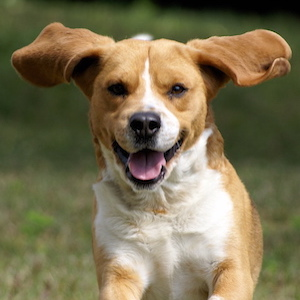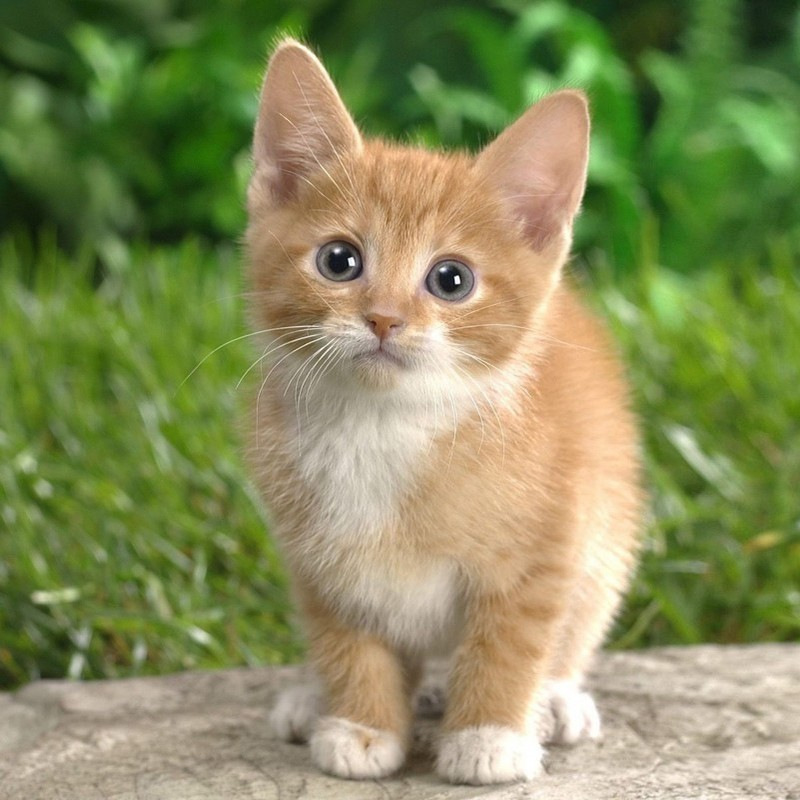

In [ ]:
#Importing required libraries
%matplotlib inline
import time
from PIL import Image
import numpy as np
import keras
from matplotlib.pyplot import imshow, figure
from keras.models import Sequential
from keras.layers import Dense

data [[0.         0.        ]
 [0.00333333 0.        ]
 [0.00666667 0.        ]
 ...
 [0.99       0.99666667]
 [0.99333333 0.99666667]
 [0.99666667 0.99666667]]
labels [[ 81  93  55]
 [ 83  95  57]
 [ 83  95  57]
 ...
 [103 110  56]
 [102 111  56]
 [105 114  57]]


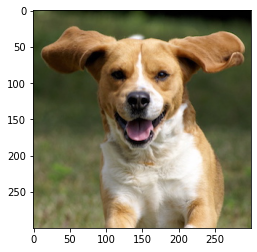

In [ ]:
#reate a helper function that converts that image into a training set of (x,y) positions (the data) and their corresponding (r,g,b) colors (the labels).
def get_data(img):
    width, height = img.size
    pixels = img.getdata()
    x_data, y_data = [],[]
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = pixels[idx]
            x_data.append([x / float(width), y / float(height)])
            y_data.append([r, g, b])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data, y_data

im1 = Image.open("/content/dog.jpg")
x1, y1 = get_data(im1)

print("data", x1)
print("labels", y1)
imshow(im1)

In [ ]:
#defining a neural network which takes a 2-neuron input (the normalized x, y position) and outputs a 3-neuron output corresponding to color.
def make_model():
    model = Sequential()
    model.add(Dense(2, activation='relu', input_shape=(2,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

m1 = make_model()

In this case, we are going to use the training set as the validation set as well. Normally, you'd never do this because it would cause your neural network to overfit. But in this experiment, we're not worried about overfitting... in fact, overfitting is the whole point!
We train for 25 epochs and have a batch size of 5.

In [ ]:
m1.fit(x1, y1, batch_size=5, epochs=5, verbose=1, validation_data=(x1, y1))

Epoch 1/5
18000/18000 [==============================] - 57s 3ms/step - loss: 3308.5920 - val_loss: 3331.4189
Epoch 2/5
18000/18000 [==============================] - 51s 3ms/step - loss: 3207.7844 - val_loss: 3175.4780
Epoch 3/5
18000/18000 [==============================] - 51s 3ms/step - loss: 3201.2888 - val_loss: 3192.4526
Epoch 4/5
18000/18000 [==============================] - 50s 3ms/step - loss: 3196.1284 - val_loss: 3159.1404
Epoch 5/5
18000/18000 [==============================] - 48s 3ms/step - loss: 3171.3921 - val_loss: 3161.8247


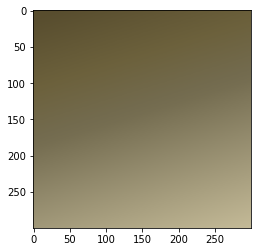

In [ ]:
#taking the training data, our pixel positions, and simply send them back straight through the network, and plot the predicted colors on a new image.
def generate_image(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img

img = generate_image(m1, x1, im1.width, im1.height)
imshow(img)

looks like the original image a bit! Of course the network can't learn the mapping perfectly without pretty much memorizing the data, but this way gives us a pretty good impression

data [[0.         0.        ]
 [0.00333333 0.        ]
 [0.00666667 0.        ]
 ...
 [0.99       0.99666667]
 [0.99333333 0.99666667]
 [0.99666667 0.99666667]]
labels [[ 37  68  36]
 [ 38  69  36]
 [ 37  68  34]
 ...
 [159 150 132]
 [173 164 148]
 [191 181 168]]


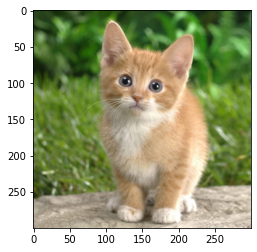

In [ ]:
#Let's load another image.
im2 = Image.open("/content/kitty.jpg")
im2 = im2.resize(im1.size)
x2, y2 = get_data(im2)

print("data", x2)
print("labels", y2)
imshow(im2)

In [ ]:
m2 = make_model()   # make a new model, keep m1 separate
m2.fit(x2, y2, batch_size=5, epochs=2, verbose=1, validation_data=(x2, y2))

Epoch 1/2
18000/18000 [==============================] - 51s 3ms/step - loss: 1909.5710 - val_loss: 1613.3826
Epoch 2/2
18000/18000 [==============================] - 47s 3ms/step - loss: 1533.5808 - val_loss: 1532.3806


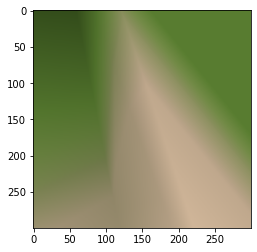

In [ ]:
img = generate_image(m2, x2, im2.width, im2.height)
imshow(img)

let make a new neural network, m3, with the same architecture as m1 and m2 but instead of training it, we'll just set its weights to be interpolations between the weights of m1 and m2 and at each step, we'll generate a new image. 
<p>But in this instead of just coloring the pixels to be the exact outputs, we'll auto-normalize every frame by rescaling the minimum and maximum output color to 0 to 255. This is because sometimes the intermediate models output in different ranges than what m1 and m2 were trained to.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


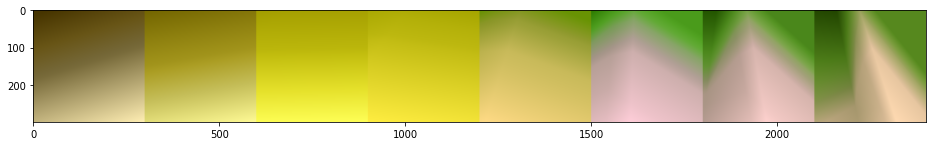

In [ ]:
def get_interpolated_weights(model1, model2, amt):
    w1 = np.array(model1.get_weights())
    w2 = np.array(model2.get_weights())
    w3 = np.add((1.0 - amt) * w1, amt * w2)
    return w3

def generate_image_rescaled(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    y_pred = 255.0 * (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))  # rescale y_pred
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img


# make new model to hold interpolated weights
m3 = make_model()
# we'll do 8 frames and stitch the images together at the end
n = 8
interpolated_images = []
for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m2, amt)
    m3.set_weights(w3)
    img = generate_image_rescaled(m3, x1, im1.width, im1.height)
    interpolated_images.append(img)

full_image = np.concatenate(interpolated_images, axis=1)
figure(figsize=(16,4))
imshow(full_image)

In [ ]:
#We'll generate 120 frames inside the assets folder, then use ffmpeg to stitch them into an mp4 file.
#ffmpeg = https://ffmpeg.org/download.html
n = 120
frames_dir = '/content/save/neural-painter-frames'
video_path = '/content/save/neural-painter-interpolation.mp4'

import os
if not os.path.isdir(frames_dir):
    os.makedirs(frames_dir)

for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m2, amt)
    m3.set_weights(w3)
    img = generate_image_rescaled(m3, x1, im1.width, im1.height)
    img.save('/content/save/neural-painter-frames/frame%04d.png'%i)

cmd = 'ffmpeg -i %s/frame%%04d.png -c:v libx264 -pix_fmt yuv420p %s' % (frames_dir, video_path)
os.system(cmd)

You can find the video now in the assets directory. Looks neat! We can also display it in this notebook. From here, there's a lot of things we can do. Triangulating between multiple images, or streaming together several interpolations, or predicting color from not just position, but time in a movie. Lots of possibilities.

In [ ]:
from IPython.display import HTML
import io
import base64

video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)

HTML(data='''<video alt="test" controls>
     <source src="data:video/mp4;base64,{0}" type="video/mp4" />
     </video>'''.format(encoded.decode('ascii')))

Will add the other comment soon